In [ ]:
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
import missingno as msno
warnings.filterwarnings('ignore')

In [ ]:
columns = ["dur","wage1","wage2","wage3","cola","hours","pension","stby_pay","shift_diff",
           "educ_allw","holidays","vacation","lngtrm_disabil","dntl_ins","bereavement","empl_hplan","class"]

df =pd.read_csv('labor-neg.data', header=None, names=columns, skipinitialspace=True)

In [ ]:
df.head()

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allw,holidays,vacation,lngtrm_disabil,dntl_ins,bereavement,empl_hplan,class
0,1,5.0,?,?,?,40,?,?,2,?,11,average,?,?,yes,?,good
1,2,4.5,5.8,?,?,35,ret_allw,?,?,yes,11,below average,?,full,?,full,good
2,?,?,?,?,?,38,empl_contr,?,5,?,11,generous,yes,half,yes,half,good
3,3,3.7,4.0,5.0,tc,?,?,?,?,yes,?,?,?,?,yes,?,good
4,3,4.5,4.5,5.0,?,40,?,?,?,?,12,average,?,half,yes,half,good


<h3>EDA

In [ ]:
df.shape

(40, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   dur             40 non-null     object
 1   wage1           40 non-null     object
 2   wage2           40 non-null     object
 3   wage3           40 non-null     object
 4   cola            40 non-null     object
 5   hours           40 non-null     object
 6   pension         40 non-null     object
 7   stby_pay        40 non-null     object
 8   shift_diff      40 non-null     object
 9   educ_allw       40 non-null     object
 10  holidays        40 non-null     object
 11  vacation        40 non-null     object
 12  lngtrm_disabil  40 non-null     object
 13  dntl_ins        40 non-null     object
 14  bereavement     40 non-null     object
 15  empl_hplan      40 non-null     object
 16  class           40 non-null     object
dtypes: object(17)
memory usage: 5.4+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
dur,40,4,2,17
wage1,40,16,2.0,8
wage2,40,12,?,10
wage3,40,8,?,28
cola,40,4,?,16
hours,40,8,40,16
pension,40,4,?,22
stby_pay,40,6,?,33
shift_diff,40,10,?,16
educ_allw,40,3,?,22


In [ ]:
df.isnull().sum()

dur               0
wage1             0
wage2             0
wage3             0
cola              0
hours             0
pension           0
stby_pay          0
shift_diff        0
educ_allw         0
holidays          0
vacation          0
lngtrm_disabil    0
dntl_ins          0
bereavement       0
empl_hplan        0
class             0
dtype: int64

dur                1
wage1              1
wage2             10
wage3             28
cola              16
hours              3
pension           22
stby_pay          33
shift_diff        16
educ_allw         22
holidays           2
vacation           3
lngtrm_disabil    24
dntl_ins          15
bereavement       20
empl_hplan        16
class              0
dtype: int64

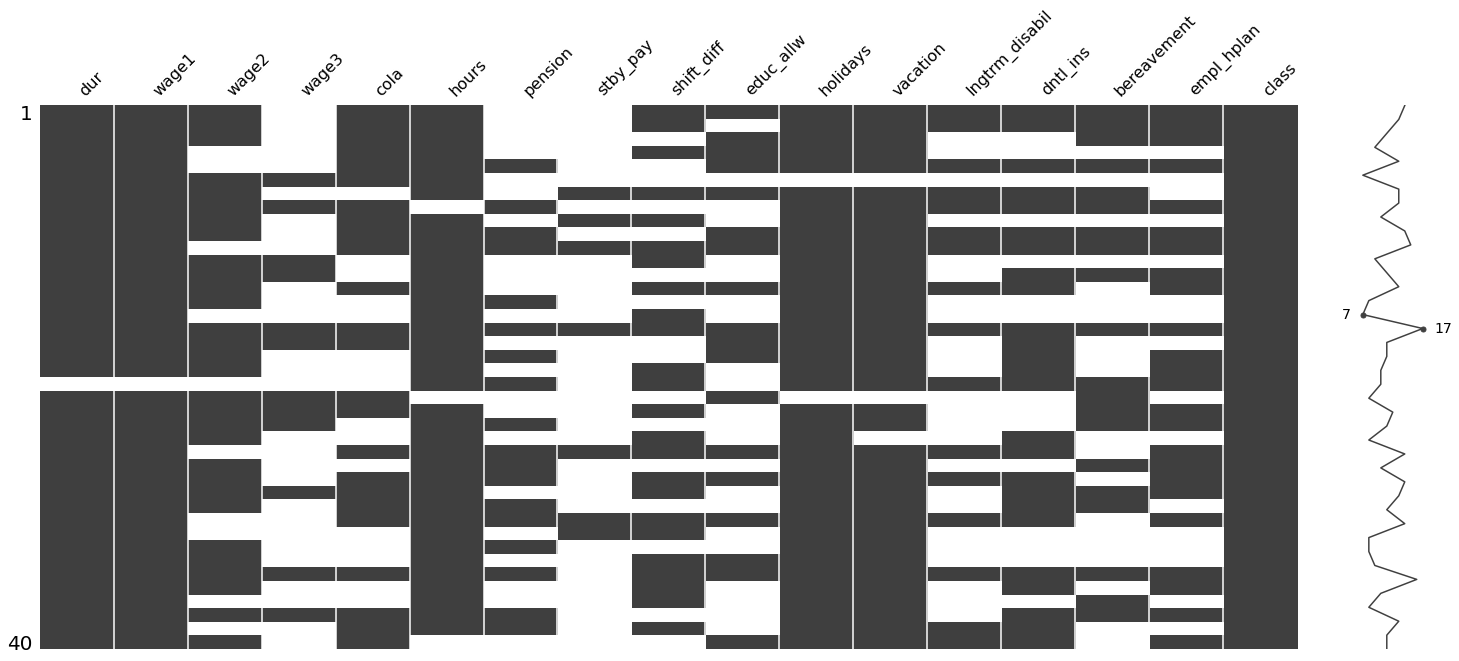

In [ ]:
object_col = df.select_dtypes(include=object).columns.tolist()
for col in object_col:
    df.loc[df[col]=='?', col] = np.nan
msno.matrix(df.sample(df.shape[0]))
df.isnull().sum()

Imputing NaN with modus

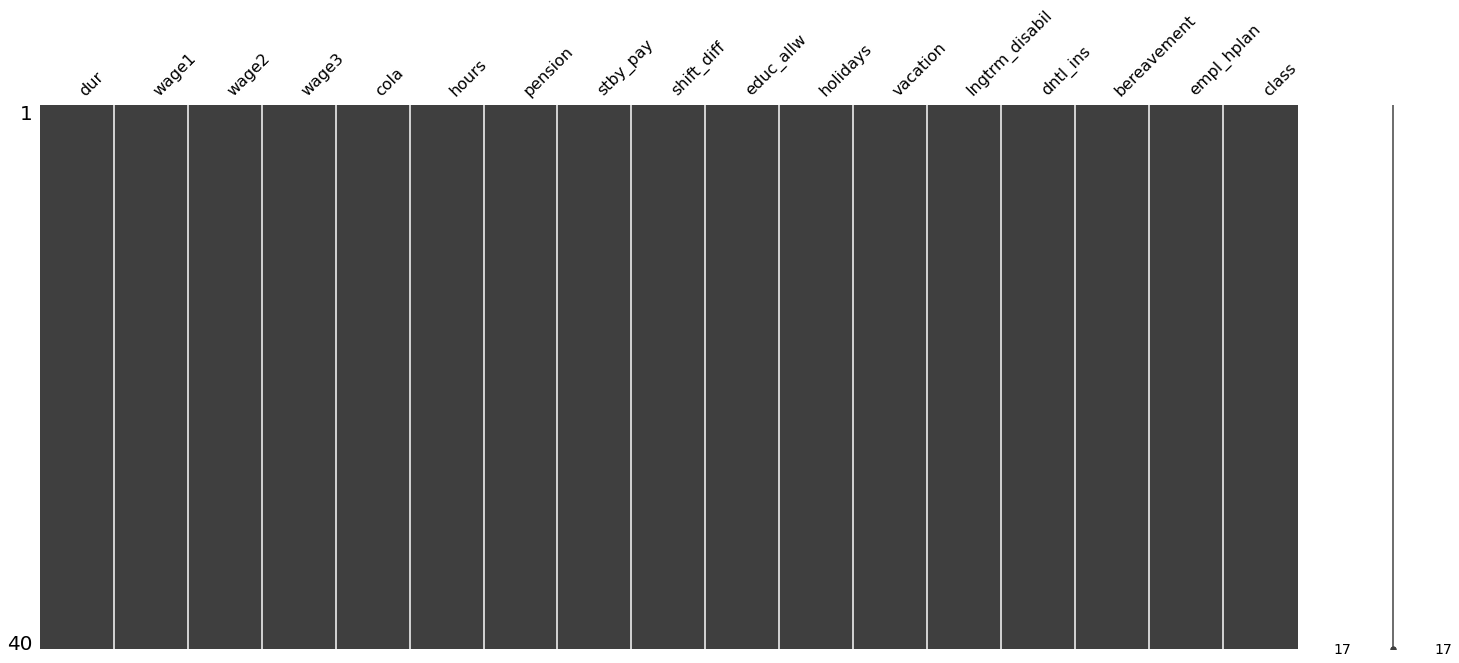

In [ ]:
for col in ["dur","wage1","wage2","wage3","cola","hours","pension","stby_pay","shift_diff",
           "educ_allw","holidays","vacation","lngtrm_disabil","dntl_ins","bereavement","empl_hplan",]:
    df[col].fillna(df[col].mode()[0], inplace=True)
msno.matrix(df.sample(df.shape[0]))

In [ ]:
df.head()

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allw,holidays,vacation,lngtrm_disabil,dntl_ins,bereavement,empl_hplan,class
0,1,5.0,4.0,5.0,none,40,none,2,2,no,11,average,yes,half,yes,full,good
1,2,4.5,5.8,5.0,none,35,ret_allw,2,3,yes,11,below average,yes,full,yes,full,good
2,2,2.0,4.0,5.0,none,38,empl_contr,2,5,no,11,generous,yes,half,yes,half,good
3,3,3.7,4.0,5.0,tc,40,none,2,3,yes,11,below average,yes,half,yes,full,good
4,3,4.5,4.5,5.0,none,40,none,2,3,no,12,average,yes,half,yes,half,good


In [ ]:
df[["dur","stby_pay","shift_diff","holidays","hours"]] = df[["dur","stby_pay","shift_diff","holidays","hours"]].astype('int')
df[["cola","pension","educ_allw","vacation","lngtrm_disabil","dntl_ins","bereavement","empl_hplan","class"]] = df[["cola","pension","educ_allw","vacation","lngtrm_disabil","dntl_ins","bereavement","empl_hplan","class"]].astype('category')
df[["wage1","wage2","wage3"]] =df[["wage1","wage2","wage3"]].astype('float')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   dur             40 non-null     int64   
 1   wage1           40 non-null     float64 
 2   wage2           40 non-null     float64 
 3   wage3           40 non-null     float64 
 4   cola            40 non-null     category
 5   hours           40 non-null     int64   
 6   pension         40 non-null     category
 7   stby_pay        40 non-null     int64   
 8   shift_diff      40 non-null     int64   
 9   educ_allw       40 non-null     category
 10  holidays        40 non-null     int64   
 11  vacation        40 non-null     category
 12  lngtrm_disabil  40 non-null     category
 13  dntl_ins        40 non-null     category
 14  bereavement     40 non-null     category
 15  empl_hplan      40 non-null     category
 16  class           40 non-null     category
dtypes: category(9), fl

Visualization

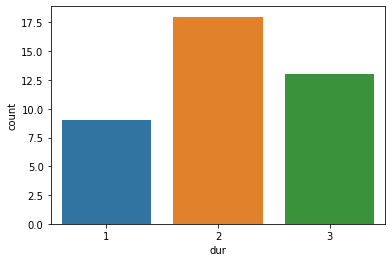

In [ ]:
ax = sns.countplot(x="dur", data=df)

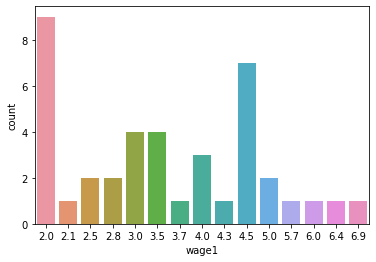

In [ ]:
ax = sns.countplot(x="wage1", data=df)

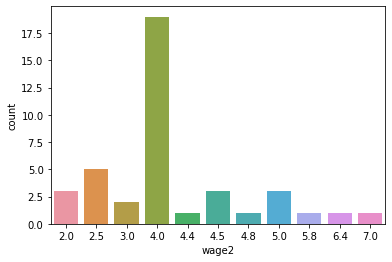

In [ ]:
ax = sns.countplot(x="wage2", data=df)

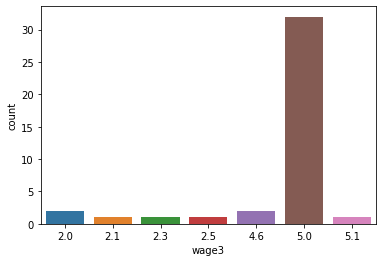

In [ ]:
ax = sns.countplot(x="wage3", data=df)

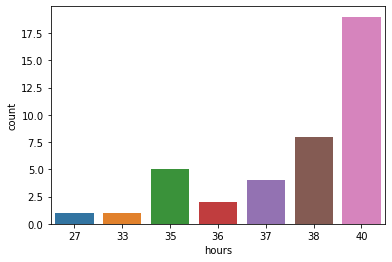

In [ ]:
ax = sns.countplot(x="hours", data=df)

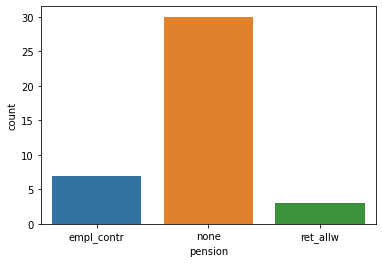

In [ ]:
ax = sns.countplot(x="pension", data=df)

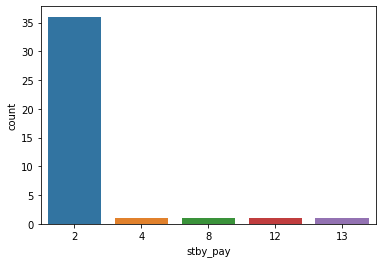

In [ ]:
ax = sns.countplot(x="stby_pay", data=df)

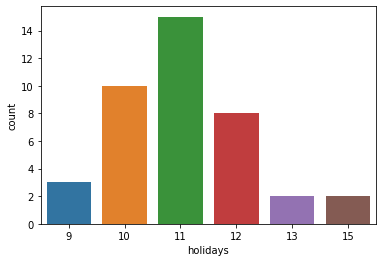

In [ ]:
ax = sns.countplot(x="holidays", data=df)

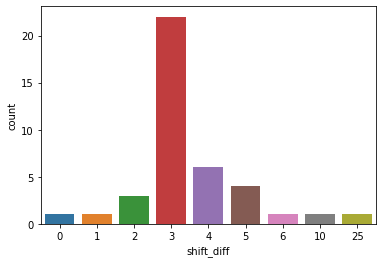

In [ ]:
ax = sns.countplot(x="shift_diff", data=df)

In [ ]:
df.head()

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allw,holidays,vacation,lngtrm_disabil,dntl_ins,bereavement,empl_hplan,class
0,1,5.0,4.0,5.0,none,40,none,2,2,no,11,average,yes,half,yes,full,good
1,2,4.5,5.8,5.0,none,35,ret_allw,2,3,yes,11,below average,yes,full,yes,full,good
2,2,2.0,4.0,5.0,none,38,empl_contr,2,5,no,11,generous,yes,half,yes,half,good
3,3,3.7,4.0,5.0,tc,40,none,2,3,yes,11,below average,yes,half,yes,full,good
4,3,4.5,4.5,5.0,none,40,none,2,3,no,12,average,yes,half,yes,half,good


# **Preprocessing**

In [ ]:
df["pension"].value_counts()

none          30
empl_contr     7
ret_allw       3
Name: pension, dtype: int64

In [ ]:
pd.qcut(df['dur'], q=2).tail()

35    (0.999, 2.0]
36    (0.999, 2.0]
37    (0.999, 2.0]
38      (2.0, 3.0]
39    (0.999, 2.0]
Name: dur, dtype: category
Categories (2, interval[float64]): [(0.999, 2.0] < (2.0, 3.0]]

In [ ]:
df['dur_range'] = pd.qcut(df['dur'], q=2, labels=['<=2', '>2'])

In [ ]:
pd.qcut(df['wage1'], q=3).tail()

35    (1.999, 2.8]
36    (1.999, 2.8]
37    (1.999, 2.8]
38    (1.999, 2.8]
39      (4.3, 6.9]
Name: wage1, dtype: category
Categories (3, interval[float64]): [(1.999, 2.8] < (2.8, 4.3] < (4.3, 6.9]]

In [ ]:
df['wage1_range'] = pd.qcut(df['wage1'], q=3, labels=['<=2.8', '>2 <=4.3','>4.3'])

In [ ]:
pd.qcut(df['wage2'], q=4).tail()

35    (1.999, 3.75]
36      (3.75, 4.0]
37      (3.75, 4.0]
38    (1.999, 3.75]
39      (3.75, 4.0]
Name: wage2, dtype: category
Categories (4, interval[float64]): [(1.999, 3.75] < (3.75, 4.0] < (4.0, 4.425] < (4.425, 7.0]]

In [ ]:
df['wage2_range'] = pd.qcut(df['wage2'], q=4, labels=['<=3.75', '>3.75 <=4','>4 <=4.42', '>4.42'])

In [ ]:
pd.qcut(df['wage3'], q=2).tail()

35    (1.999, 5.0]
36    (1.999, 5.0]
37    (1.999, 5.0]
38    (1.999, 5.0]
39    (1.999, 5.0]
Name: wage3, dtype: category
Categories (2, interval[float64]): [(1.999, 5.0] < (5.0, 5.1]]

In [ ]:
df['wage3_range'] = pd.qcut(df['wage3'], q=2, labels=['<=5', '>5'])

In [ ]:
pd.qcut(df['hours'], q=2).tail()

35      (38.0, 40.0]
36      (38.0, 40.0]
37    (26.999, 38.0]
38    (26.999, 38.0]
39      (38.0, 40.0]
Name: hours, dtype: category
Categories (2, interval[float64]): [(26.999, 38.0] < (38.0, 40.0]]

In [ ]:
df['hours_range'] = pd.qcut(df['hours'], q=2, labels=['<=38', '>40'])

In [ ]:
pd.qcut(df['stby_pay'], q=1).tail()

35    (1.999, 13.0]
36    (1.999, 13.0]
37    (1.999, 13.0]
38    (1.999, 13.0]
39    (1.999, 13.0]
Name: stby_pay, dtype: category
Categories (1, interval[float64]): [(1.999, 13.0]]

In [ ]:
df['stby_pay_range'] = pd.qcut(df['stby_pay'], q=1, labels=['<=13'])

In [ ]:
pd.qcut(df['shift_diff'], q=2).tail()

35    (-0.001, 3.0]
36    (-0.001, 3.0]
37    (-0.001, 3.0]
38    (-0.001, 3.0]
39      (3.0, 25.0]
Name: shift_diff, dtype: category
Categories (2, interval[float64]): [(-0.001, 3.0] < (3.0, 25.0]]

In [ ]:
df['shift_diff_range'] = pd.qcut(df['shift_diff'], q=2, labels=['<=3', '>3'])

In [ ]:
pd.qcut(df['holidays'], q=4).tail()

35     (10.0, 11.0]
36     (10.0, 11.0]
37    (8.999, 10.0]
38    (8.999, 10.0]
39     (11.0, 12.0]
Name: holidays, dtype: category
Categories (4, interval[float64]): [(8.999, 10.0] < (10.0, 11.0] < (11.0, 12.0] < (12.0, 15.0]]

In [ ]:
df['holidays_range'] = pd.qcut(df['holidays'], q=4, labels=['<=10','>1 <=11','>11 <= 12', '>12'])

In [ ]:
pd.qcut(df['shift_diff'], q=2).tail()

35    (-0.001, 3.0]
36    (-0.001, 3.0]
37    (-0.001, 3.0]
38    (-0.001, 3.0]
39      (3.0, 25.0]
Name: shift_diff, dtype: category
Categories (2, interval[float64]): [(-0.001, 3.0] < (3.0, 25.0]]

In [ ]:
df['shift_diff_range'] = pd.qcut(df['shift_diff'], q=2, labels=['<=3','>3'])

In [ ]:
df.head()

,dur,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allw,holidays,vacation,lngtrm_disabil,dntl_ins,bereavement,empl_hplan,class,dur_range,wage1_range,wage2_range,wage3_range,hours_range,stby_pay_range,shift_diff_range,holidays_range
0,1,5.0,4.0,5.0,none,40,none,2,2,no,11,average,yes,half,yes,full,good,<=2,>4.3,>3.75 <=4,<=5,>40,<=13,<=3,>1 <=11
1,2,4.5,5.8,5.0,none,35,ret_allw,2,3,yes,11,below average,yes,full,yes,full,good,<=2,>4.3,>4.42,<=5,<=38,<=13,<=3,>1 <=11
2,2,2.0,4.0,5.0,none,38,empl_contr,2,5,no,11,generous,yes,half,yes,half,good,<=2,<=2.8,>3.75 <=4,<=5,<=38,<=13,>3,>1 <=11
3,3,3.7,4.0,5.0,tc,40,none,2,3,yes,11,below average,yes,half,yes,full,good,>2,>2 <=4.3,>3.75 <=4,<=5,>40,<=13,<=3,>1 <=11
4,3,4.5,4.5,5.0,none,40,none,2,3,no,12,average,yes,half,yes,half,good,>2,>4.3,>4.42,<=5,>40,<=13,<=3,>11 <= 12


In [ ]:
not_used_columns = ["wage1","wage2","wage3","dur","stby_pay","shift_diff","holidays","hours"]
df.drop(labels=not_used_columns, axis=1, inplace=True)

In [ ]:
df.shape

(40, 17)

In [ ]:
df_new = pd.get_dummies(df, columns=df.columns)

In [ ]:
df_new.head()

,cola_none,cola_tc,cola_tcf,pension_empl_contr,pension_none,pension_ret_allw,educ_allw_no,educ_allw_yes,vacation_average,vacation_below average,vacation_generous,lngtrm_disabil_no,lngtrm_disabil_yes,dntl_ins_full,dntl_ins_half,dntl_ins_none,bereavement_no,bereavement_yes,empl_hplan_full,empl_hplan_half,empl_hplan_none,class_bad,class_good,dur_range_<=2,dur_range_>2,wage1_range_<=2.8,wage1_range_>2 <=4.3,wage1_range_>4.3,wage2_range_<=3.75,wage2_range_>3.75 <=4,wage2_range_>4 <=4.42,wage2_range_>4.42,wage3_range_<=5,wage3_range_>5,hours_range_<=38,hours_range_>40,stby_pay_range_<=13,shift_diff_range_<=3,shift_diff_range_>3,holidays_range_<=10,holidays_range_>1 <=11,holidays_range_>11 <= 12,holidays_range_>12
0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0
1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0
2,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0
3,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0
4,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,1,0


In [ ]:
df_new.duplicated().sum()

0

In [ ]:
df_new.shape

(40, 43)

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
#Apriori min support
min_support = 0.15

#Max lenght of apriori n-grams

frequent_items = apriori(df_new, use_colnames=True, min_support=min_support)

In [ ]:
frequent_items

,support,itemsets
0,0.750,(cola_none)
1,0.150,(cola_tc)
2,0.175,(pension_empl_contr)
3,0.750,(pension_none)
4,0.825,(educ_allw_no)
...,...,...
26774,0.150,"(lngtrm_disabil_yes, bereavement_yes, dur_rang..."
26775,0.150,"(lngtrm_disabil_yes, bereavement_yes, dur_rang..."
26776,0.150,"(lngtrm_disabil_yes, dntl_ins_half, bereavemen..."
26777,0.150,"(lngtrm_disabil_yes, shift_diff_range_>3, bere..."


In [ ]:
rules = association_rules(frequent_items, metric ="lift", min_threshold = 1) 

In [ ]:
rules.head(10).sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(vacation_average),(cola_none),0.275,0.750,0.275,1.000000,1.333333,0.06875,inf
9,(cola_none),(lngtrm_disabil_yes),0.750,0.875,0.675,0.900000,1.028571,0.01875,1.250000
0,(pension_empl_contr),(cola_none),0.175,0.750,0.150,0.857143,1.142857,0.01875,1.750000
4,(cola_none),(educ_allw_no),0.750,0.825,0.625,0.833333,1.010101,0.00625,1.050000
8,(lngtrm_disabil_yes),(cola_none),0.875,0.750,0.675,0.771429,1.028571,0.01875,1.093750
2,(pension_none),(cola_none),0.750,0.750,0.575,0.766667,1.022222,0.01250,1.071429
3,(cola_none),(pension_none),0.750,0.750,0.575,0.766667,1.022222,0.01250,1.071429
5,(educ_allw_no),(cola_none),0.825,0.750,0.625,0.757576,1.010101,0.00625,1.031250
7,(cola_none),(vacation_average),0.750,0.275,0.275,0.366667,1.333333,0.06875,1.144737
1,(cola_none),(pension_empl_contr),0.750,0.175,0.150,0.200000,1.142857,0.01875,1.031250


In [ ]:
rules.shape

(1988718, 9)

In [ ]:
df['class'].value_counts()

good    26
bad     14
Name: class, dtype: int64

In [ ]:

min_support = 0.2


max_len = 10

frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

target = '{\'Attrition_No\'}'

results_attrition_no = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)

results_attrition_no.head(10)